# Pandas

In [0]:
!pip3 install pandas plotly numpy

In [0]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [0]:
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}

In [242]:
purchases = pd.DataFrame(data)
purchases

apples  oranges
0       3        0
1       2        3
2       0        7
3       1        2

In [243]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

In [244]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

Reading data

In [0]:
base_url = "https://gist.githubusercontent.com/alti-tude/710cb9d4dfc7ebcd0afb9cf93d8f6a8d/raw/574730ba009e69b81d6c79f2fef2c3dd5145db0a/"

In [246]:
df = pd.read_csv(base_url + "purchases.csv")
df = pd.read_csv(base_url + "purchases.csv", index_col=0)
df

apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2

In [247]:
movies_df = pd.read_csv(base_url + 'IMDB-Movie-Data.csv', index_col="Title")
movies_df

Rank  ... Metascore
Title                          ...          
Guardians of the Galaxy     1  ...      76.0
Prometheus                  2  ...      65.0
Split                       3  ...      62.0
Sing                        4  ...      59.0
Suicide Squad               5  ...      40.0
...                       ...  ...       ...
Secret in Their Eyes      996  ...      45.0
Hostel: Part II           997  ...      46.0
Step Up 2: The Streets    998  ...      50.0
Search Party              999  ...      22.0
Nine Lives               1000  ...      11.0

[1000 rows x 11 columns]

In [248]:

movies_df.tail()
movies_df.head()

Rank  ... Metascore
Title                          ...          
Guardians of the Galaxy     1  ...      76.0
Prometheus                  2  ...      65.0
Split                       3  ...      62.0
Sing                        4  ...      59.0
Suicide Squad               5  ...      40.0

[5 rows x 11 columns]

In [249]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [250]:
movies_df.shape

(1000, 11)

Handling Duplicates

In [251]:
temp_df = movies_df.append(movies_df)
temp_df.shape

(2000, 11)

In [252]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(1000, 11)

In [253]:
movies_df.rename(columns={
    'Runtime (Minutes)': 'Runtime',
    'Revenue (Millions)': 'Revenue_millions'
}, inplace=True)

movies_df

Rank  ... Metascore
Title                          ...          
Guardians of the Galaxy     1  ...      76.0
Prometheus                  2  ...      65.0
Split                       3  ...      62.0
Sing                        4  ...      59.0
Suicide Squad               5  ...      40.0
...                       ...  ...       ...
Secret in Their Eyes      996  ...      45.0
Hostel: Part II           997  ...      46.0
Step Up 2: The Streets    998  ...      50.0
Search Party              999  ...      22.0
Nine Lives               1000  ...      11.0

[1000 rows x 11 columns]

In [254]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [0]:
# specify all columns name by yourself
# movies_df.columns = ['rank', .....]
# movies_df.columns

Handling Missing values

In [256]:
movies_df.isnull()

Rank  Genre  ...  Revenue_millions  Metascore
Title                                  ...                             
Guardians of the Galaxy  False  False  ...             False      False
Prometheus               False  False  ...             False      False
Split                    False  False  ...             False      False
Sing                     False  False  ...             False      False
Suicide Squad            False  False  ...             False      False
...                        ...    ...  ...               ...        ...
Secret in Their Eyes     False  False  ...              True      False
Hostel: Part II          False  False  ...             False      False
Step Up 2: The Streets   False  False  ...             False      False
Search Party             False  False  ...              True      False
Nine Lives               False  False  ...             False      False

[1000 rows x 11 columns]

In [257]:
# Removing null values
movies_df.dropna()
movies_df.dropna().isnull()

Rank  Genre  ...  Revenue_millions  Metascore
Title                                   ...                             
Guardians of the Galaxy   False  False  ...             False      False
Prometheus                False  False  ...             False      False
Split                     False  False  ...             False      False
Sing                      False  False  ...             False      False
Suicide Squad             False  False  ...             False      False
...                         ...    ...  ...               ...        ...
Resident Evil: Afterlife  False  False  ...             False      False
Project X                 False  False  ...             False      False
Hostel: Part II           False  False  ...             False      False
Step Up 2: The Streets    False  False  ...             False      False
Nine Lives                False  False  ...             False      False

[838 rows x 11 columns]

In [0]:
# Imputation  adding mean value in place of null
revenue = movies_df['Revenue_millions']
revenue_mean = revenue.mean()   # mean along columns
revenue_mean
revenue.fillna(revenue_mean, inplace=True)

In [259]:
revenue

Title
Guardians of the Galaxy    333.130000
Prometheus                 126.460000
Split                      138.120000
Sing                       270.320000
Suicide Squad              325.020000
                              ...    
Secret in Their Eyes        82.956376
Hostel: Part II             17.540000
Step Up 2: The Streets      58.010000
Search Party                82.956376
Nine Lives                  19.640000
Name: Revenue_millions, Length: 1000, dtype: float64

DataFrame slicing, selecting, extracting

In [260]:
genre_col = movies_df[['Genre', 'Description']]

type(genre_col), genre_col

(pandas.core.frame.DataFrame,
                                             Genre                                        Description
 Title                                                                                               
 Guardians of the Galaxy   Action,Adventure,Sci-Fi  A group of intergalactic criminals are forced ...
 Prometheus               Adventure,Mystery,Sci-Fi  Following clues to the origin of mankind, a te...
 Split                             Horror,Thriller  Three girls are kidnapped by a man with a diag...
 Sing                      Animation,Comedy,Family  In a city of humanoid animals, a hustling thea...
 Suicide Squad            Action,Adventure,Fantasy  A secret government agency recruits some of th...
 ...                                           ...                                                ...
 Secret in Their Eyes          Crime,Drama,Mystery  A tight-knit team of rising investigators, alo...
 Hostel: Part II                            Horror  

In [261]:
# By rows
prom = movies_df.loc['Prometheus']
prom

Rank                                                                2
Genre                                        Adventure,Mystery,Sci-Fi
Description         Following clues to the origin of mankind, a te...
Director                                                 Ridley Scott
Actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                             2012
Runtime                                                           124
Rating                                                              7
Votes                                                          485820
Revenue_millions                                               126.46
Metascore                                                          65
Name: Prometheus, dtype: object

In [262]:
# acces row using row no.
prom = movies_df.iloc[1]
prom = movies_df.iloc[1:3]
prom

Rank                     Genre  ... Revenue_millions Metascore
Title                                       ...                           
Prometheus     2  Adventure,Mystery,Sci-Fi  ...           126.46      65.0
Split          3           Horror,Thriller  ...           138.12      62.0

[2 rows x 11 columns]

In [263]:
movie_subset = movies_df.loc['Prometheus':'Sing']  # 'Sing' included
movie_subset

movie_subset = movies_df.iloc[2:4]  # 4 not included
movie_subset

Rank                    Genre  ... Revenue_millions Metascore
Title                                 ...                           
Split     3          Horror,Thriller  ...           138.12      62.0
Sing      4  Animation,Comedy,Family  ...           270.32      59.0

[2 rows x 11 columns]

In [264]:
movies_df['Director'] == 'Ridley Scott'
movies_df[movies_df['Director'] == 'Ridley Scott']

Rank  ... Metascore
Title                         ...          
Prometheus                 2  ...      65.0
The Martian              103  ...      80.0
Robin Hood               388  ...      53.0
American Gangster        471  ...      76.0
Exodus: Gods and Kings   517  ...      52.0
The Counselor            522  ...      48.0
A Good Year              531  ...      47.0
Body of Lies             738  ...      57.0

[8 rows x 11 columns]

In [265]:
movies_df[movies_df['Rating'] >= 8.6].head(3)

Rank                    Genre  ... Revenue_millions Metascore
Title                                           ...                           
Interstellar       37   Adventure,Drama,Sci-Fi  ...           187.99      74.0
The Dark Knight    55       Action,Crime,Drama  ...           533.32      82.0
Inception          81  Action,Adventure,Sci-Fi  ...           292.57      74.0

[3 rows x 11 columns]

In [266]:
movies_df[(movies_df['Director'] == 'Ridley Scott') | (movies_df['Director'] == 'Christopher Nolan')]

Rank  ... Metascore
Title                         ...          
Prometheus                 2  ...      65.0
Interstellar              37  ...      74.0
The Dark Knight           55  ...      82.0
The Prestige              65  ...      66.0
Inception                 81  ...      74.0
The Martian              103  ...      80.0
The Dark Knight Rises    125  ...      78.0
Robin Hood               388  ...      53.0
American Gangster        471  ...      76.0
Exodus: Gods and Kings   517  ...      52.0
The Counselor            522  ...      48.0
A Good Year              531  ...      47.0
Body of Lies             738  ...      57.0

[13 rows x 11 columns]

In [267]:
movies_df[((movies_df['Year'] >= 2005) & (movies_df['Year'] <= 2010)) & (movies_df['Rating'] > 8.0) & (movies_df['Revenue_millions'] < movies_df['Revenue_millions'].quantile(0.25))]

Rank               Genre  ... Revenue_millions Metascore
Title                                          ...                           
3 Idiots              431        Comedy,Drama  ...             6.52      67.0
The Lives of Others   477      Drama,Thriller  ...            11.28      89.0
Incendies             714   Drama,Mystery,War  ...             6.86      80.0
Taare Zameen Par      992  Drama,Family,Music  ...             1.20      42.0

[4 rows x 11 columns]

In [0]:
def rating_function(x):
  if x >= 8.0:
    return "good"
  else:
    return "bad"

In [269]:
movies_df['rating_category'] = movies_df['Rating'].apply(rating_function)
movies_df['rating_category'] = movies_df['Rating'].apply(lambda x: 'good' if x >= 8.0 else 'bad')

movies_df.head(2)

Rank  ... rating_category
Title                          ...                
Guardians of the Galaxy     1  ...            good
Prometheus                  2  ...             bad

[2 rows x 12 columns]

## Task

In [270]:
# Load Data
music_df = pd.read_csv(base_url + 'MusicTop50.csv')
music_df

Unnamed: 0  ... Popularity
0            1  ...       79.0
1            2  ...       92.0
2            3  ...       85.0
3            4  ...       86.0
4            5  ...       94.0
5            6  ...       84.0
6            7  ...       92.0
7            8  ...       90.0
8            9  ...       87.0
9           10  ...       95.0
10          11  ...       93.0
11          12  ...        NaN
12          13  ...       88.0
13          14  ...       87.0
14          15  ...       92.0
15          16  ...       82.0
16          17  ...       90.0
17          18  ...       91.0
18          19  ...       88.0
19          20  ...       91.0
20          21  ...       91.0
21          22  ...       91.0
22          23  ...       83.0
23          24  ...       91.0
24          25  ...       89.0
25          26  ...       70.0
26          27  ...       83.0
27          28  ...       89.0
28          29  ...       91.0
29          30  ...       89.0
30          31  ...       84.0
31          32  ...       89.0
32          33  ...       89.0
33          34  ...       89.0
34          35  ...       89.0
35          36  ...       89.0
36          37  ...       91.0
37          38  ...       87.0
38          39  ...       80.0
39          40  ...       78.0
40          41  ...       88.0
41          42  ...       90.0
42          43  ...       87.0
43          44  ...       84.0
44          45  ...       88.0
45          46  ...       88.0
46          47  ...       88.0
47          48  ...       88.0
48          49  ...       88.0
49          50  ...       82.0

[50 rows x 14 columns]

In [271]:
# Visualise Data
music_df.head(5)
music_df.tail(5)

Unnamed: 0  ... Popularity
45          46  ...       88.0
46          47  ...       88.0
47          48  ...       88.0
48          49  ...       88.0
49          50  ...       82.0

[5 rows x 14 columns]

In [272]:
# Clean Data

# 1. renaming columns
music_df.rename(columns={
    'Genre': 'genre',
    'Energy': 'energy'
}, inplace=True)

music_df

Unnamed: 0  ... Popularity
0            1  ...       79.0
1            2  ...       92.0
2            3  ...       85.0
3            4  ...       86.0
4            5  ...       94.0
5            6  ...       84.0
6            7  ...       92.0
7            8  ...       90.0
8            9  ...       87.0
9           10  ...       95.0
10          11  ...       93.0
11          12  ...        NaN
12          13  ...       88.0
13          14  ...       87.0
14          15  ...       92.0
15          16  ...       82.0
16          17  ...       90.0
17          18  ...       91.0
18          19  ...       88.0
19          20  ...       91.0
20          21  ...       91.0
21          22  ...       91.0
22          23  ...       83.0
23          24  ...       91.0
24          25  ...       89.0
25          26  ...       70.0
26          27  ...       83.0
27          28  ...       89.0
28          29  ...       91.0
29          30  ...       89.0
30          31  ...       84.0
31          32  ...       89.0
32          33  ...       89.0
33          34  ...       89.0
34          35  ...       89.0
35          36  ...       89.0
36          37  ...       91.0
37          38  ...       87.0
38          39  ...       80.0
39          40  ...       78.0
40          41  ...       88.0
41          42  ...       90.0
42          43  ...       87.0
43          44  ...       84.0
44          45  ...       88.0
45          46  ...       88.0
46          47  ...       88.0
47          48  ...       88.0
48          49  ...       88.0
49          50  ...       82.0

[50 rows x 14 columns]

In [273]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          50 non-null     int64  
 1   Track.Name          50 non-null     object 
 2   Artist.Name         50 non-null     object 
 3   genre               50 non-null     object 
 4   Beats.Per.Minute    48 non-null     float64
 5   energy              49 non-null     float64
 6   Danceability..db..  50 non-null     int64  
 7   Loudness..          50 non-null     int64  
 8   Liveness.           48 non-null     float64
 9   Valence ()          49 non-null     float64
 10  Length              47 non-null     float64
 11  Acousticness        50 non-null     int64  
 12  Speechiness         50 non-null     int64  
 13  Popularity          49 non-null     float64
dtypes: float64(6), int64(5), object(3)
memory usage: 5.6+ KB


In [0]:
# 2. missing values

music_df.dropna()
mean = music_df.mean()
music_df.fillna(mean, inplace=True)
median = music_df.median()
music_df.fillna(median, inplace=True)

In [275]:
# Query data

# Loudest song by the artist whose song is least popular

music_df[music_df['Popularity'] == music_df['Popularity'].min()].sort_values(by=['Loudness..']).iloc[0]

Unnamed: 0                             26
Track.Name            If I Can't Have You
Artist.Name                  Shawn Mendes
genre                        canadian pop
Beats.Per.Minute                  119.354
energy                                 82
Danceability..db..                     69
Loudness..                             -4
Liveness.                         13.7917
Valence ()                             87
Length                                191
Acousticness                           49
Speechiness                             6
Popularity                             70
Name: 25, dtype: object

## Plot Data

In [0]:
import plotly.graph_objects as go

In [277]:
df = music_df
df.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'genre', 'Beats.Per.Minute',
       'energy', 'Danceability..db..', 'Loudness..', 'Liveness.', 'Valence ()',
       'Length', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [278]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.sort_values(by='Loudness..')['Loudness..'],
    y=df.sort_values(by='Loudness..')['energy'],
    name = 'Energy'
))

fig.add_trace(go.Scatter(
    x=df.sort_values(by='Loudness..')['Loudness..'],
    y=df.sort_values(by='Loudness..')['Beats.Per.Minute'],
    name = 'Beats Per Minute'
))

fig.update_layout(xaxis_title="Loudness")
fig.show()

In [279]:
names, counts = np.unique(df['Artist.Name'], return_counts = True)

df2 = pd.DataFrame.from_dict(dict(zip(names, counts)), orient='index').reset_index()
df2.columns = ['names', 'counts']
df2.sort_values('counts', ascending=False).head()

names  counts
9     Ed Sheeran       4
19     Lil Nas X       2
32  Shawn Mendes       2
25    Marshmello       2
28   Post Malone       2

In [280]:
df2.sort_values('counts', ascending=False, inplace=True)

fig = go.Figure()
fig.add_trace(go.Bar(x=df2.iloc[:10].names, y=df2.iloc[:10].counts))
fig.update_layout(xaxis_title='Artists', yaxis_title="Number of Songs")

# Image Processing Techniques

In [281]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

### Exercise 1

Read lena.png and print the dimensions.
Read chair.png and print the dimensions.
Verify if you are getting 4 channels in chair.png
Plot the mask of the chair in the image chair.png


(512, 512, 3)


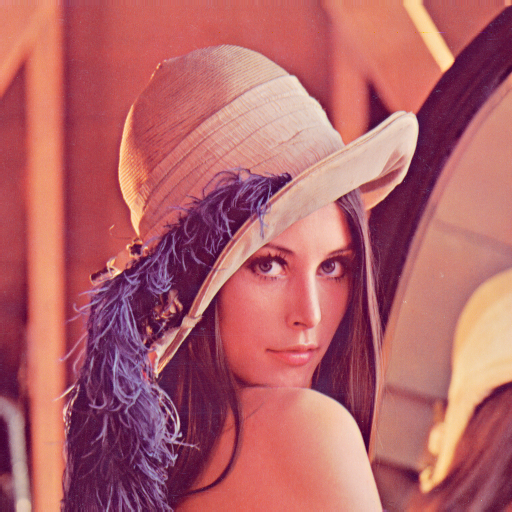

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]]


In [283]:

I = cv2.imread('/content/lena.png')
print (I.shape)
cv2_imshow(I)

print (I[0:2][0:1])

(137, 137, 3)


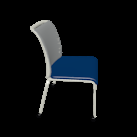

In [284]:
I = cv2.imread('/content/chair.png')
print (I.shape)
cv2_imshow(I)

(137, 137, 4)


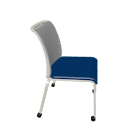

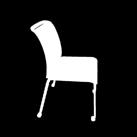

In [285]:
# 4 channels and mask of chair

I = cv2.imread('/content/chair.png', cv2.IMREAD_UNCHANGED)
print (I.shape)
cv2_imshow(I)
cv2_imshow(I[:,:,3])

### Exercise 2
Read lena.png in grayscale and shift the intensity values by 45 and visualize. 


In [0]:
I_lena_bw = cv2.imread('/content/lena.png', cv2.IMREAD_GRAYSCALE)

In [0]:
linear_shift = 45
lena_shifted1 = I_lena_bw + linear_shift

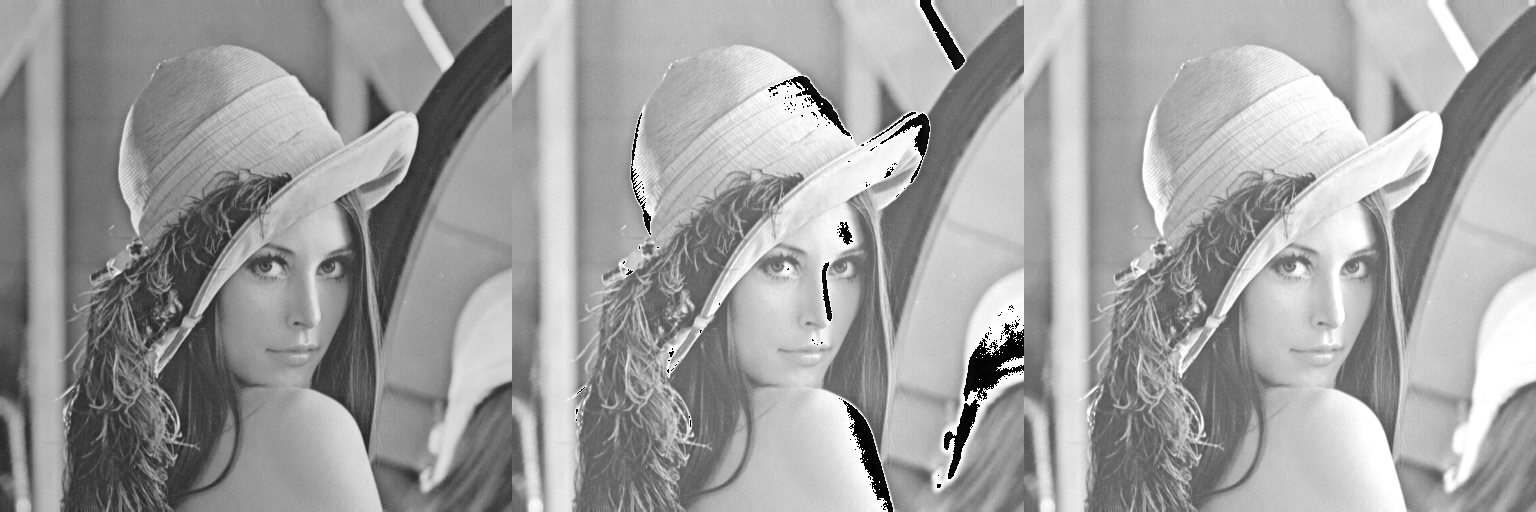

In [288]:
I = I_lena_bw.astype('int')
lena_shifted = np.clip((I + linear_shift),0,255).astype('uint8')
cv2_imshow(np.hstack([I,lena_shifted1, lena_shifted]))

# Plotting the Histogram
fig = go.Figure()
fig.add_trace(go.Histogram(x=I.ravel(), name= 'Original Image'))
fig.add_trace(go.Histogram(x=lena_shifted1.ravel(), name= 'Incorrect Transformation'))
fig.add_trace(go.Histogram(x=lena_shifted.ravel(), name= 'Correct Transformation'))
fig.show()

## Exercise
Perform gamma transformation on the images gamma1.jpg and gamma2.jpg and see which values of gamma give you better images. Use C = 1.


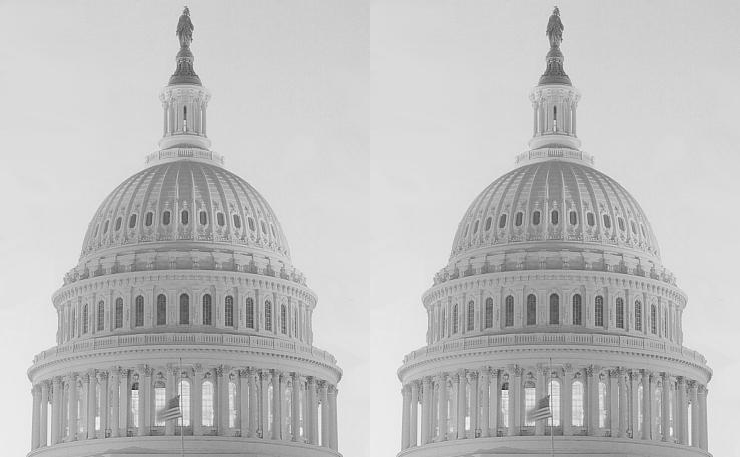

In [289]:
# Power Law (Gamma) Transform

g1 = cv2.imread('/content/gamma1.jpg', cv2.IMREAD_GRAYSCALE)
g2 = cv2.imread('/content/gamma2.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(np.hstack([g1,g1]))

In [0]:
g1 = g1.astype('float')
g2 = g1.astype('float')
g1 /= 255
g2 /= 255
c = 1

In [0]:
gamma = [0.2, 0.5, 2, 3]

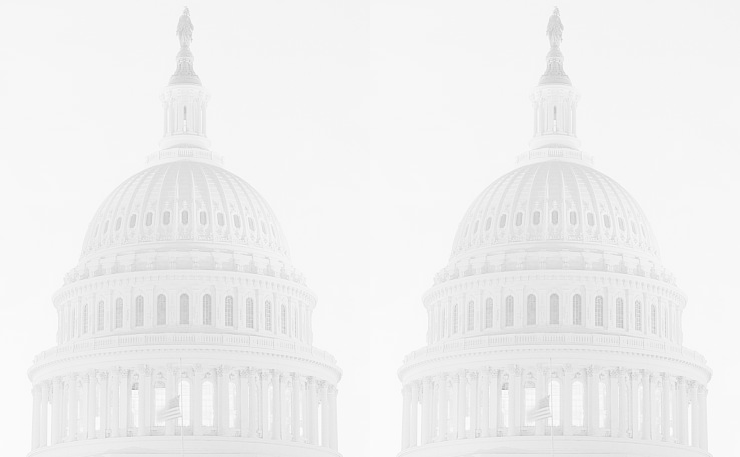

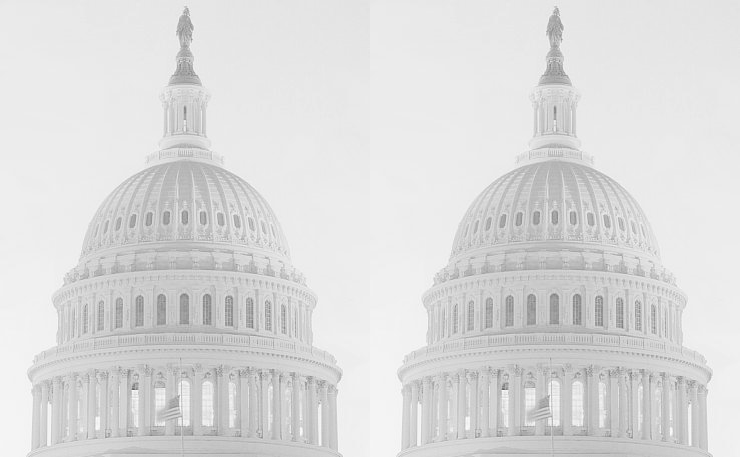

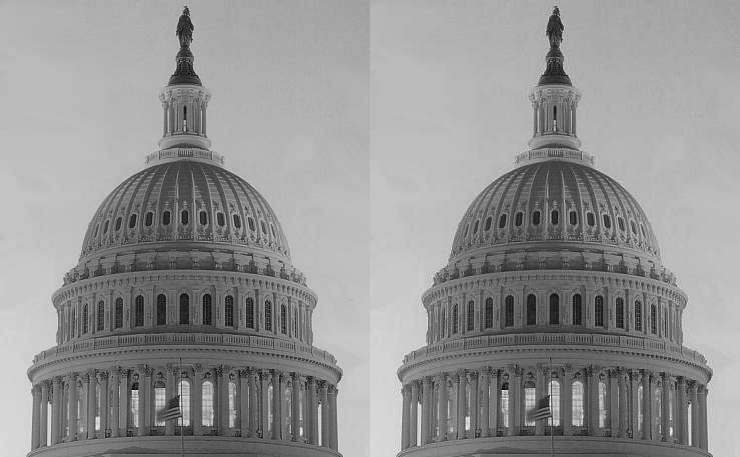

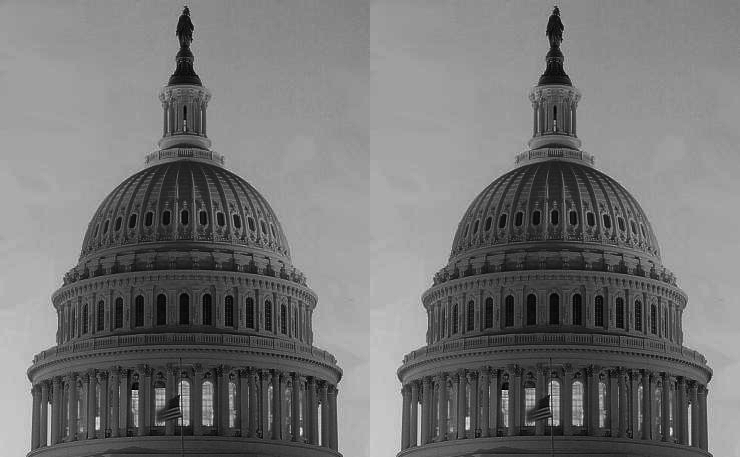

In [292]:
for i in gamma:
  n_g1 = np.clip(c * pow(g1, i) * 255, 0, 255).astype('uint8')
  n_g2 = np.clip(c * pow(g2, i) * 255, 0, 255).astype('uint8')
  cv2_imshow(np.hstack([n_g1,n_g1]))